
### **Neural Networks Project-2**

**The Real Problem**


Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.
More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.
In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**Project Description**

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

**The Street View House Numbers (SVHN) Dataset**

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).

Acknowledgement for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

Data Set:
● The name of the dataset is SVHN_single_grey1.h5
● The data is a subset of the original dataset. Use this subset only for the project.
● Keep a copy of your dataset in your own google drive.

# **Project Objectives**

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:

● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

● Data fetching and understand the train/val/test splits.

● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

● Print the classification metric report (2.5 points)

● Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

● Implement batch normalization for training the neural network (2.5 points)

● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import libraries for KNN classification Model

In [0]:


import numpy as np  
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py

# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('/content/drive/My Drive/Intro to Neural Networks & Deep Learning/Project2/SVHN_single_grey1.h5')


# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

In [5]:
X_train.shape
X_test.shape
X_val.shape
y_train.shape
y_test.shape
y_val.shape

(42000, 32, 32)

(18000, 32, 32)

(60000, 32, 32)

(42000,)

(18000,)

(60000,)

In [6]:
print("Number of Classes in y_test:{}, y_train:{}, y_val:{}".format(len(np.unique(y_test)),
                                                                    len(np.unique(y_train)), len(np.unique(y_val))))

Number of Classes in y_test:10, y_train:10, y_val:10


Visualizing the dataset

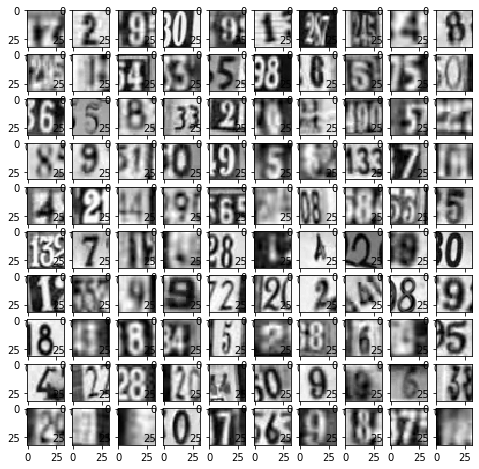

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

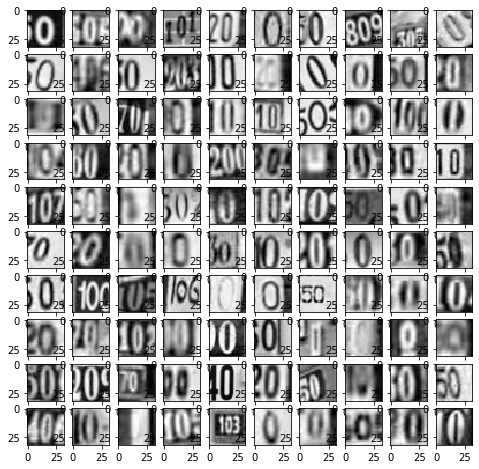

In [8]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_val[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

# Take subset of data for efficient code execution 


In [9]:
import tensorflow as tf
#Subsample the data for more efficient code execution in this exercise
num_training =  5000
mask = range(num_training)
X_train_sub = X_train[mask]
y_train_sub = y_train[mask]

num_val = 1000
mask = range(num_val)
X_val_sub = X_val[mask]
y_val_sub = y_val[mask]

num_test = 1000
mask = range(num_test)
X_test_sub = X_test[mask]
y_test_sub = y_test[mask]

In [40]:
print(X_train_sub.shape)
print(X_test_sub.shape)
print(X_val_sub.shape)
print(y_train_sub.shape)
print(y_test_sub.shape)
print(y_val_sub.shape)

(5000, 32, 32)
(1000, 32, 32)
(1000, 32, 32)
(5000,)
(1000,)
(1000,)


### **Reshape the Data**

In [0]:
# Reshape the image data into rows
X_train_sub_reshaped = np.reshape(X_train_sub, (X_train_sub.shape[0], -1))
X_test_sub_reshaped = np.reshape(X_test_sub, (X_test_sub.shape[0], -1))
X_val_sub_reshaped = np.reshape(X_val_sub, (X_val_sub.shape[0], -1))

In [11]:
print(X_train_sub_reshaped.shape)
print(X_test_sub_reshaped.shape)
print(X_val_sub_reshaped.shape)
print(y_train_sub.shape)
print(y_test_sub.shape)
print(y_val_sub.shape)

(5000, 1024)
(1000, 1024)
(1000, 1024)
(5000,)
(1000,)
(1000,)


### **Implement and apply an optimal k-Nearest Neighbor (kNN) classifier**

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

In [0]:
# Create a k-NN classifier with 10 neighbors

NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' )


In [14]:
# Fit the KNN classifier with the training data

NNH.fit(X_train_sub_reshaped, y_train_sub)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [16]:
# Print the accuracy
print("Accuracy with k = 10: ", NNH.score(X_val_sub_reshaped, y_val_sub)*100, '%')

Accuracy with k = 10:  48.3 %


### Compare k-Nearest Neighbor accuracy for various values of k


In [17]:
kVals = range(1, 30, 2)
accuracies = []
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 20, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_sub_reshaped, y_train_sub)
 
    # evaluate the model and update the accuracies list
    score = model.score(X_val_sub_reshaped, y_val_sub)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

k=1, accuracy=42.20%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

k=3, accuracy=61.50%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

k=5, accuracy=56.80%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

k=7, accuracy=53.70%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

k=9, accuracy=55.30%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

k=11, accuracy=53.70%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

k=13, accuracy=52.30%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

k=15, accuracy=54.10%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

k=17, accuracy=54.00%


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

k=19, accuracy=51.00%
k=3 achieved highest accuracy of 61.50% on validation data


In [18]:
from sklearn.metrics import classification_report
# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_sub_reshaped, y_train_sub)
predictions = model.predict(X_test_sub_reshaped)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test_sub, predictions))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.30      0.63      0.41       117
           1       0.29      0.61      0.39        93
           2       0.28      0.38      0.33        92
           3       0.25      0.25      0.25        85
           4       0.51      0.43      0.47        96
           5       0.35      0.21      0.26       105
           6       0.33      0.22      0.27        94
           7       0.72      0.46      0.56       107
           8       0.48      0.16      0.24       100
           9       0.41      0.17      0.24       111

    accuracy                           0.36      1000
   macro avg       0.39      0.35      0.34      1000
weighted avg       0.40      0.35      0.34      1000



In [0]:
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
# loop over a few random digits
for i in list(map(int, np.random.randint(0, high=len(y_test_sub), size=(5,)))):
    # grab the image and classify it
    image = X_test_sub[i]
    prediction = model.predict(image.reshape(1, -1))[0]
 
    # convert the image for a 1024-dim array to an 32 x 32 image,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((32, 32)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
    # show the prediction
    print("Digit predicted for i - {} is: {}".format(i, prediction))
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

### **Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations)**

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [22]:
from keras import backend as K
K.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer 
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [23]:
model.fit(X_train,y_train_cat,  validation_data=(X_test,y_test_cat), epochs=10,batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 85us/sample - loss: 2.0650 - acc: 0.2660 - val_loss: 2.4404 - val_acc: 0.3045
Epoch 2/10
42000/42000 [==============================] - 3s 72us/sample - loss: 1.3040 - acc: 0.5820 - val_loss: 1.3556 - val_acc: 0.5730
Epoch 3/10
42000/42000 [==============================] - 3s 69us/sample - loss: 1.0196 - acc: 0.6791 - val_loss: 1.3115 - val_acc: 0.6019
Epoch 4/10
42000/42000 [==============================] - 3s 67us/sample - loss: 0.8878 - acc: 0.7241 - val_loss: 1.1932 - val_acc: 0.6543
Epoch 5/10
42000/42000 [==============================] - 3s 69us/sample - loss: 0.7963 - acc: 0.7514 - val_loss: 1.1453 - val_acc: 0.6676
Epoch 6/10
42000/42000 [==============================] - 3s 71us/sample - loss: 0.7370 - acc: 0.7710 - val_loss: 0.9967 - val_acc: 0.7066
Epoch 7/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.6812 - acc: 0.7899 - val_loss: 1.

In [0]:
#Now let us try with varying learning rates with same model hyperparameters
sgd_optimizer_lr_1 = tf.keras.optimizers.SGD(lr=0.01)
sgd_optimizer_lr_5 = tf.keras.optimizers.SGD(lr=0.05)
sgd_optimizer_lr_10 = tf.keras.optimizers.SGD(lr=0.1)

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_1, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train_cat,  validation_data=(X_test,y_test_cat), epochs=10,batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.4915 - acc: 0.8511 - val_loss: 0.6957 - val_acc: 0.8013
Epoch 2/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4668 - acc: 0.8585 - val_loss: 0.6544 - val_acc: 0.8147
Epoch 3/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4582 - acc: 0.8614 - val_loss: 0.6318 - val_acc: 0.8196
Epoch 4/10
42000/42000 [==============================] - 3s 71us/sample - loss: 0.4486 - acc: 0.8630 - val_loss: 0.6580 - val_acc: 0.8099
Epoch 5/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4416 - acc: 0.8644 - val_loss: 0.6471 - val_acc: 0.8147
Epoch 6/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4339 - acc: 0.8665 - val_loss: 0.7452 - val_acc: 0.7893
Epoch 7/10
42000/42000 [==============================] - 3s 71us/sample - loss: 0.4275 - acc: 0.8687 - val_loss: 0.

In [27]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_1, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train_cat,  validation_data=(X_test,y_test_cat), epochs=10,batch_size=128)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 76us/sample - loss: 0.3976 - acc: 0.8766 - val_loss: 0.8242 - val_acc: 0.7734
Epoch 2/10
42000/42000 [==============================] - 3s 74us/sample - loss: 0.3929 - acc: 0.8785 - val_loss: 0.6298 - val_acc: 0.8260
Epoch 3/10
42000/42000 [==============================] - 3s 74us/sample - loss: 0.3871 - acc: 0.8799 - val_loss: 0.7283 - val_acc: 0.7958
Epoch 4/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.3815 - acc: 0.8815 - val_loss: 0.7054 - val_acc: 0.8042
Epoch 5/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.3777 - acc: 0.8838 - val_loss: 0.7204 - val_acc: 0.8023
Epoch 6/10
42000/42000 [==============================] - 3s 74us/sample - loss: 0.3710 - acc: 0.8862 - val_loss: 0.7153 - val_acc: 0.8049
Epoch 7/10
42000/42000 [==============================] - 3s 71us/sample - loss: 0.3625 - acc: 0.8874 - val_loss: 0.

In [0]:
#Compile the model
adam_optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
model.compile(optimizer= adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train,y_train_cat,  validation_data=(X_test,y_test_cat), epochs=10,batch_size=128)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 86us/sample - loss: 0.5218 - acc: 0.8350 - val_loss: 0.7528 - val_acc: 0.7891
Epoch 2/10
42000/42000 [==============================] - 4s 83us/sample - loss: 0.4807 - acc: 0.8483 - val_loss: 0.7116 - val_acc: 0.7978
Epoch 3/10
42000/42000 [==============================] - 3s 82us/sample - loss: 0.4830 - acc: 0.8480 - val_loss: 0.6669 - val_acc: 0.8089
Epoch 4/10
42000/42000 [==============================] - 3s 79us/sample - loss: 0.4647 - acc: 0.8533 - val_loss: 0.6815 - val_acc: 0.8077
Epoch 5/10
42000/42000 [==============================] - 3s 79us/sample - loss: 0.4513 - acc: 0.8553 - val_loss: 0.6568 - val_acc: 0.8179
Epoch 6/10
42000/42000 [==============================] - 3s 80us/sample - loss: 0.4306 - acc: 0.8627 - val_loss: 0.6338 - val_acc: 0.8236
Epoch 7/10
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4135 - acc: 0.8694 - val_loss: 0.

We see excellent results after various combinations of Adam Optimizer Learning Rates and witness the highest accuracy of all models and hyperparameters with Adam Optimizer having a learning rate of 0.0005 and Batch Size 128 with 10 epochs. It is certain that results may improve through further tuning.


From above we note that Deep Neural Networks offer a significant improvement in image classification accuracy as compared to plain vanilla KNN Classifiers. Therefore, the use of DNN with Keras for image classification is justified.

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

In [0]:
def load_image(img, show=True):
  
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [0]:
# above code is not working. lets try another code


In [32]:
#Lets Predict Images using our model
out = model.predict(X_test[0:10])
print(np.argmax(out, axis=1))

[0 7 2 9 0 9 1 8 1 4]


The digit predicted is: 0


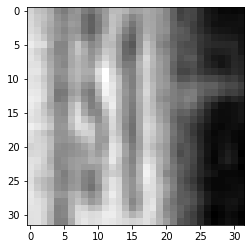

The digit predicted is: 7


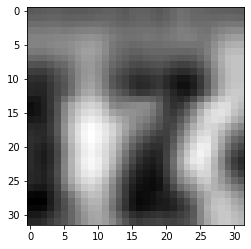

The digit predicted is: 2


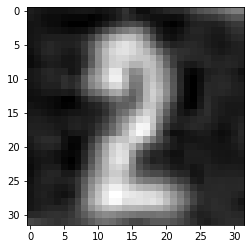

The digit predicted is: 9


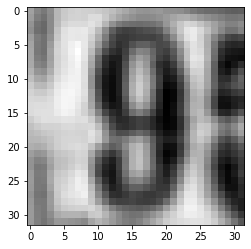

The digit predicted is: 0


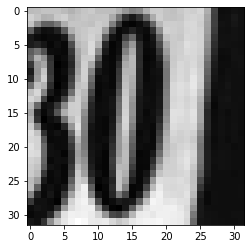

The digit predicted is: 9


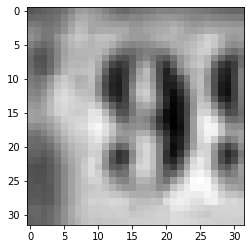

The digit predicted is: 1


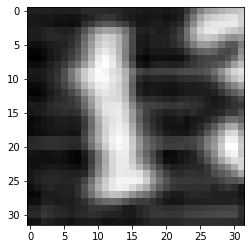

The digit predicted is: 8


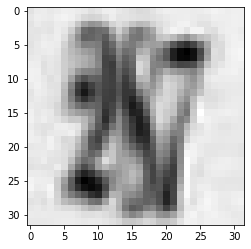

The digit predicted is: 1


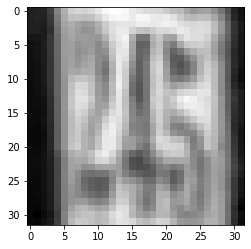

The digit predicted is: 4


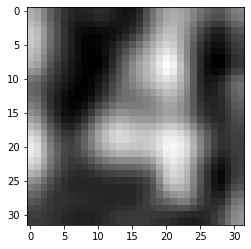

In [33]:
for i in range(0,10):
    print("The digit predicted is: {}".format(np.argmax(out, axis=1)[i]))
    plt.imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

## **Conclusion**

Based on above models - both classical as well through Deep Neural Networks, we may reach the conclusion that DNNs are quite efficient for image classification.

DNN can process more data faster than KNN

Metrics show accuracy to be sub par i.e. below 50% for classical ML KNN models whereas they show a healthy accuracy for tuned models around 87%.